<a href="https://colab.research.google.com/github/aniruddh-alt/MNIST-NeuralNetwork_From_Scratch/blob/main/NeuralNetwork_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook will implement a neural network that is used to train on the MNIST data set, from scratch without the use any deeplearning libraries.


In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aniruddhanramesh","key":"dfc5d883ac59f4ec4bb3bb0921a6b9c8"}'}

In [3]:
!mkdir -p ~/.config/kaggle
!mv kaggle.json ~/.config/kaggle/

In [4]:
!kaggle competitions download -c digit-recognizer

 33% 5.00M/15.3M [00:00<00:00, 37.3MB/s]
100% 15.3M/15.3M [00:00<00:00, 75.8MB/s]


In [5]:
!unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [6]:
data = pd.read_csv('train.csv')

In [7]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
import matplotlib.pyplot as plt

In [9]:
np.random.seed(32)

In [10]:
### define the sigmoid activation function

def sigmoid(z):
  return 1/(1+np.exp(-z))

def sigmoid_derivative(z):
  return sigmoid(z)*(1-sigmoid(z))


In [11]:
### define the relu activation function

def relu(z):
  return np.maximum(z,0)

def relu_derivative(z):
  return z > 0


In [12]:
### define the softmax activation function

def softmax(z):
  z_max = np.max(z, axis=-1, keepdims=True)
  exp_z = np.exp(z - z_max)  # Subtract the max for numerical stability
  return exp_z / np.sum(exp_z, axis=-1, keepdims=True)

In [13]:
data.shape

(42000, 785)

In [14]:
split = int(data.shape[0] * 0.2)
data = data.sample(frac=1)
train = data[split:]
test = data[:split]

In [15]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
20443,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33440,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3859,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34849,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19527,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24828,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20414,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9526,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
def onehot_encoding(data):
  data = data.T
  labels = np.unique(data)
  size = len(labels)
  ohe_data = np.zeros((data.size, data.max()+1))
  ohe_data[np.arange(data.size), data] = 1
  return ohe_data

def xy_split(data):
  data = np.array(data)
  return data[:,:1], data[:,1:]

In [17]:
y_train, X_train = xy_split(train)
y_test, X_test = xy_split(test)
print(f"{y_train.shape=}, {X_train.shape=}")

y_train.shape=(33600, 1), X_train.shape=(33600, 784)


In [18]:
ohe_y_train = onehot_encoding(y_train)
ohe_y_test = onehot_encoding(y_test)
ohe_y_train.shape

(33600, 10)

In [19]:
class Config:
    input_nodes = X_train.shape[1]
    n_classes = len(np.unique(y_train))
    learning_rate = 0.0001
    epochs = 50
    batch_size = 32

In [20]:
class BatchGenerator:
    def __init__(self, X_data, y_data, batch_size):
        self.X_data = X_data
        self.y_data = y_data
        self.batch_size = batch_size
        self.num_samples = len(X_data)
        self.num_batches = int(np.ceil(self.num_samples / self.batch_size))
        self.current_batch = 0

    def __len__(self):
        return self.num_batches

    def __iter__(self):
        return self

    def __next__(self):
        start_idx = self.current_batch * self.batch_size
        end_idx = min(start_idx + self.batch_size, self.num_samples)

        if start_idx >= self.num_samples:
            self.current_batch = 0
            raise StopIteration

        batch_X = self.X_data[start_idx:end_idx]
        batch_y = self.y_data[start_idx:end_idx]

        self.current_batch += 1

        return batch_X, batch_y

    def reset_iterator(self):
        self.current_batch = 0

In [21]:
# Create data loaders
train_loader = BatchGenerator(X_train, ohe_y_train, Config.batch_size)
test_loader = BatchGenerator(X_test, ohe_y_test, Config.batch_size)

# Print shapes
batch_X, batch_y = next(iter(train_loader))
train_loader.reset_iterator()
print(f"Input Shape: {batch_X.shape}, Output Shape: {batch_y.shape}")

Input Shape: (32, 784), Output Shape: (32, 10)


In [22]:
### defining a layer class for a linear layer of the neural network

class Linear:
  def __init__(self, input_nodes, output_nodes, activation):
    self.input_nodes = input_nodes
    self.output_nodes = output_nodes
    self.activation = activation
    self.w = None
    self.b = None
    self.init_params()
    self.layer_type = 'Linear'

  def init_params(self):
    # using Xavier uniform init
    input_units = self.input_nodes
    output_units = self.output_nodes
    self.w = np.random.uniform(
        low = -np.sqrt(6.0 / (input_units + output_units)),
        high = np.sqrt(6.0 / (input_units + output_units)),
        size = (input_units, output_units)
    )
    self.b = np.zeros(output_units)

  def _forward(self, inputs):
    # z = w * X + B
    z = np.matmul(inputs, self.w) + self.b
    if self.activation == 'relu':
      a = relu(z)
    elif self.activation == 'softmax':
      a = softmax(z)
    else:
      raise ValueError('Activation function not valid!')
    return a, z


  def _backward(self, error, A_before, W_prev, Z_curr):
  # Compute dZ based on activation function
    if self.activation == 'relu':
        # For ReLU: dZ = error * relu_derivative(Z_curr)
        error = np.multiply(
            np.matmul(error, W_prev.T), relu_derivative(Z_curr)
        )
    elif self.activation == 'sigmoid':
        # For Sigmoid: dZ = error * sigmoid_derivative(Z_curr)
        error = np.multiply(
            np.matmul(error, W_prev.T), sigmoid_derivative(Z_curr)
        )

    # Compute gradients
    dW = np.matmul(A_before.T, error)
    db = np.sum(error, axis=0)

    return dW, db, error


In [23]:
class NeuralNetwork:
  def __init__(self, network=None):
    self.network = [] if network is None else network
    self.architecture = {}
    self.parameters = {}
    self._z = []
    self._a = []
    self.weight_gradients = []
    self.bias_gradients = []
    self._compiled = False

  def __str__(self):
      architect = "\n".join([str(item) for item in self.architecture.items()])
      return "\n".join(["-"*100, architect, "-"*100])

  def __call__(self, x, requires_gradients=True):
      return self.forward(x, requires_gradients=requires_gradients)

  def add(self, layer):
      if not self._compiled:
          self.network.append(layer)
      else:
          raise RuntimeError("Cannot add layers after compiling.")

  def compile(self):
    if self._compiled:
      raise RuntimeError('Network already compiled!')
    else:
      self.build_parameters()
      for i, layer in enumerate(self.network):
        self.architecture[f'Layer_{i}'] = {
            "Layer Type": layer.layer_type,
            "Input nodes": layer.input_nodes,
            "Output nodes": layer.output_nodes,
            "Activation": layer.activation
        }

  def build_parameters(self):
      for i, layer in enumerate(self.network):
          self.parameters[f'Layer.{i}.{layer.layer_type}'] = {
              'weights': layer.w,
              'biases': layer.b
          }

  def forward(self, x, requires_gradients=True):
    if requires_gradients:
      self._a.append(x)
    for layer in self.network:
      a_curr, z_curr = layer._forward(x)
      if requires_gradients:
        self._a.append(a_curr)
        self._z.append(z_curr)
      x = a_curr
    return a_curr

  def zero_gradients(self):
    self.weight_gradients = []
    self.bias_gradients = []
    self._z = []
    self._a = []

  def backward(self, prediction, true):
      error = prediction - true
      self.weight_gradients = []
      self.bias_gradients = []

      for i in reversed(range(len(self.network))):
          layer = self.network[i]
          if i == len(self.network) - 1:
              w_prev = None
          else:
              w_prev = self.parameters[f'Layer.{i + 1}.{self.network[i + 1].layer_type}']['weights']

          dw, db, error = layer._backward(
              error,
              self._a[i],
              w_prev,
              self._z[i]
          )
          self.weight_gradients.insert(0, dw)
          self.bias_gradients.insert(0, db)

  def step(self, learning_rate):
        for i, key in enumerate(list(self.parameters.keys())):
          self.parameters[key]['weights'] -= learning_rate * self.weight_gradients[i]
          self.parameters[key]['biases'] -= learning_rate * self.bias_gradients[i]



In [24]:
def cross_entropy(y_pred, y_true, epsilon=1e-10):
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip values to avoid log(0)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=-1))

In [25]:
model = NeuralNetwork([
    Linear(Config.input_nodes, 128, 'relu'),
    Linear(128, 64, 'relu'),
    Linear(64, Config.n_classes, 'softmax')
])

model.compile()

In [26]:
print(model)

----------------------------------------------------------------------------------------------------
('Layer_0', {'Layer Type': 'Linear', 'Input nodes': 784, 'Output nodes': 128, 'Activation': 'relu'})
('Layer_1', {'Layer Type': 'Linear', 'Input nodes': 128, 'Output nodes': 64, 'Activation': 'relu'})
('Layer_2', {'Layer Type': 'Linear', 'Input nodes': 64, 'Output nodes': 10, 'Activation': 'softmax'})
----------------------------------------------------------------------------------------------------


In [27]:
class Classifier:
  def __init__(self, model, configs, train_loader, eval_loader, loss_fn):
    self.model = model
    self.configs = configs
    self.train_loader = train_loader
    self.eval_loader = eval_loader
    self.history = {} # Track training
    self.loss_fn = loss_fn


  def _train_epoch(self):
    running_loss = 0.0
    n_correct = 0
    samples = 0
    progress_bar = tqdm(enumerate(self.train_loader), total=len(self.train_loader))

    for idx, (in_data, labels) in progress_bar:
      self.model.zero_gradients()

      output = self.model(in_data)
      loss = self.loss_fn(output, labels)

      self.model.backward(output,labels)
      self.model.step(learning_rate=self.configs.learning_rate)

      running_loss += loss
      n_correct += np.sum(output.argmax(-1) == labels.argmax(-1))
      samples += len(labels)

      avg_loss = running_loss / (idx+1)
      avg_accuracy = n_correct / samples

      log = 'Batch: {} | Loss: {:.4f} | Accuracy: {:.4f}'.format(idx+1, avg_loss, avg_accuracy)
      progress_bar.set_description(log)

    return avg_loss, avg_accuracy

  def evaluate(self):
    running_loss = 0.0
    n_correct = 0
    samples = 0
    progress_bar = tqdm(enumerate(self.eval_loader), total=len(self.eval_loader))

    for idx, (in_data, labels) in progress_bar:

      output = self.model(in_data)
      loss = self.loss_fn(output, labels)

      running_loss += loss
      n_correct += np.sum(output.argmax(-1) == labels.argmax(-1))
      samples += len(labels)

      avg_loss = running_loss / (idx+1)
      avg_accuracy = n_correct / samples
      log = 'Batch: {} | Loss: {:.4f} | Accuracy: {:.4f}'.format(idx+1, avg_loss, avg_accuracy)
      progress_bar.set_description(log)

    return avg_loss, avg_accuracy

  def train(self):
    train_accuracies, train_losses = [], []
    eval_accuracies, eval_losses = [], []
    for epoch in range(self.configs.epochs):
        print(f"Epoch {epoch+1}/{self.configs.epochs}:")

        train_loss, train_acc = self._train_epoch()
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)

        eval_loss, eval_acc = self.evaluate()
        eval_losses.append(eval_loss)
        eval_accuracies.append(eval_acc)

        print() # Indent for next epoch

    self.history['training'] = {
        'accuracy': train_accuracies,
        'loss': train_losses
    }

    self.history['eval'] = {
        'accuracy': eval_accuracies,
        'loss': eval_losses
    }

    return self.history

  def predict(self, x):
    output = self.model(x, requires_gradients=False)
    return output.argmax(-1)



In [28]:
classifier = Classifier(
    model,
    Config,
    train_loader,
    train_loader,
    cross_entropy
)

history = classifier.train()

Epoch 1/50:


Batch: 1050 | Loss: 1.6836 | Accuracy: 0.4747: 100%|██████████| 1050/1050 [00:07<00:00, 147.15it/s]
Batch: 1050 | Loss: 1.1790 | Accuracy: 0.5929: 100%|██████████| 1050/1050 [00:06<00:00, 167.84it/s]



Epoch 2/50:


Batch: 1050 | Loss: 1.0152 | Accuracy: 0.6650: 100%|██████████| 1050/1050 [00:07<00:00, 140.60it/s]
Batch: 1050 | Loss: 0.8700 | Accuracy: 0.7319: 100%|██████████| 1050/1050 [00:05<00:00, 207.88it/s]



Epoch 3/50:


Batch: 1050 | Loss: 0.7274 | Accuracy: 0.7872: 100%|██████████| 1050/1050 [00:08<00:00, 125.14it/s]
Batch: 1050 | Loss: 0.6193 | Accuracy: 0.8119: 100%|██████████| 1050/1050 [00:04<00:00, 220.02it/s]



Epoch 4/50:


Batch: 1050 | Loss: 0.5722 | Accuracy: 0.8256: 100%|██████████| 1050/1050 [00:07<00:00, 136.78it/s]
Batch: 1050 | Loss: 0.5286 | Accuracy: 0.8395: 100%|██████████| 1050/1050 [00:05<00:00, 209.81it/s]



Epoch 5/50:


Batch: 1050 | Loss: 0.4821 | Accuracy: 0.8565: 100%|██████████| 1050/1050 [00:07<00:00, 146.69it/s]
Batch: 1050 | Loss: 0.4420 | Accuracy: 0.8683: 100%|██████████| 1050/1050 [00:05<00:00, 209.62it/s]



Epoch 6/50:


Batch: 1050 | Loss: 0.4198 | Accuracy: 0.8763: 100%|██████████| 1050/1050 [00:08<00:00, 122.60it/s]
Batch: 1050 | Loss: 0.4044 | Accuracy: 0.8810: 100%|██████████| 1050/1050 [00:04<00:00, 215.08it/s]



Epoch 7/50:


Batch: 1050 | Loss: 0.3794 | Accuracy: 0.8895: 100%|██████████| 1050/1050 [00:07<00:00, 134.45it/s]
Batch: 1050 | Loss: 0.3709 | Accuracy: 0.8896: 100%|██████████| 1050/1050 [00:04<00:00, 229.83it/s]



Epoch 8/50:


Batch: 1050 | Loss: 0.3527 | Accuracy: 0.8981: 100%|██████████| 1050/1050 [00:07<00:00, 139.15it/s]
Batch: 1050 | Loss: 0.3661 | Accuracy: 0.8937: 100%|██████████| 1050/1050 [00:04<00:00, 225.05it/s]



Epoch 9/50:


Batch: 1050 | Loss: 0.3345 | Accuracy: 0.9017: 100%|██████████| 1050/1050 [00:08<00:00, 120.32it/s]
Batch: 1050 | Loss: 0.3480 | Accuracy: 0.8987: 100%|██████████| 1050/1050 [00:04<00:00, 222.22it/s]



Epoch 10/50:


Batch: 1050 | Loss: 0.3155 | Accuracy: 0.9069: 100%|██████████| 1050/1050 [00:08<00:00, 123.91it/s]
Batch: 1050 | Loss: 0.3135 | Accuracy: 0.9080: 100%|██████████| 1050/1050 [00:04<00:00, 221.86it/s]



Epoch 11/50:


Batch: 1050 | Loss: 0.3044 | Accuracy: 0.9099: 100%|██████████| 1050/1050 [00:07<00:00, 132.71it/s]
Batch: 1050 | Loss: 0.3037 | Accuracy: 0.9102: 100%|██████████| 1050/1050 [00:04<00:00, 234.84it/s]



Epoch 12/50:


Batch: 1050 | Loss: 0.2922 | Accuracy: 0.9130: 100%|██████████| 1050/1050 [00:08<00:00, 125.42it/s]
Batch: 1050 | Loss: 0.3065 | Accuracy: 0.9089: 100%|██████████| 1050/1050 [00:04<00:00, 234.84it/s]



Epoch 13/50:


Batch: 1050 | Loss: 0.2881 | Accuracy: 0.9146: 100%|██████████| 1050/1050 [00:08<00:00, 126.62it/s]
Batch: 1050 | Loss: 0.2930 | Accuracy: 0.9134: 100%|██████████| 1050/1050 [00:04<00:00, 231.82it/s]



Epoch 14/50:


Batch: 1050 | Loss: 0.2777 | Accuracy: 0.9175: 100%|██████████| 1050/1050 [00:07<00:00, 143.09it/s]
Batch: 1050 | Loss: 0.2818 | Accuracy: 0.9152: 100%|██████████| 1050/1050 [00:04<00:00, 226.76it/s]



Epoch 15/50:


Batch: 1050 | Loss: 0.2700 | Accuracy: 0.9193: 100%|██████████| 1050/1050 [00:08<00:00, 119.19it/s]
Batch: 1050 | Loss: 0.2912 | Accuracy: 0.9079: 100%|██████████| 1050/1050 [00:04<00:00, 225.56it/s]



Epoch 16/50:


Batch: 1050 | Loss: 0.2643 | Accuracy: 0.9220: 100%|██████████| 1050/1050 [00:08<00:00, 129.20it/s]
Batch: 1050 | Loss: 0.2702 | Accuracy: 0.9213: 100%|██████████| 1050/1050 [00:04<00:00, 216.35it/s]



Epoch 17/50:


Batch: 1050 | Loss: 0.2593 | Accuracy: 0.9224: 100%|██████████| 1050/1050 [00:07<00:00, 135.56it/s]
Batch: 1050 | Loss: 0.2579 | Accuracy: 0.9222: 100%|██████████| 1050/1050 [00:04<00:00, 222.27it/s]



Epoch 18/50:


Batch: 1050 | Loss: 0.2546 | Accuracy: 0.9233: 100%|██████████| 1050/1050 [00:08<00:00, 121.49it/s]
Batch: 1050 | Loss: 0.2561 | Accuracy: 0.9232: 100%|██████████| 1050/1050 [00:04<00:00, 235.98it/s]



Epoch 19/50:


Batch: 1050 | Loss: 0.2508 | Accuracy: 0.9250: 100%|██████████| 1050/1050 [00:07<00:00, 133.69it/s]
Batch: 1050 | Loss: 0.2464 | Accuracy: 0.9269: 100%|██████████| 1050/1050 [00:04<00:00, 221.56it/s]



Epoch 20/50:


Batch: 1050 | Loss: 0.2443 | Accuracy: 0.9270: 100%|██████████| 1050/1050 [00:08<00:00, 125.55it/s]
Batch: 1050 | Loss: 0.2409 | Accuracy: 0.9267: 100%|██████████| 1050/1050 [00:04<00:00, 244.62it/s]



Epoch 21/50:


Batch: 1050 | Loss: 0.2405 | Accuracy: 0.9280: 100%|██████████| 1050/1050 [00:07<00:00, 131.34it/s]
Batch: 1050 | Loss: 0.2374 | Accuracy: 0.9276: 100%|██████████| 1050/1050 [00:05<00:00, 196.18it/s]



Epoch 22/50:


Batch: 1050 | Loss: 0.2367 | Accuracy: 0.9297: 100%|██████████| 1050/1050 [00:07<00:00, 143.50it/s]
Batch: 1050 | Loss: 0.2329 | Accuracy: 0.9284: 100%|██████████| 1050/1050 [00:04<00:00, 233.07it/s]



Epoch 23/50:


Batch: 1050 | Loss: 0.2321 | Accuracy: 0.9305: 100%|██████████| 1050/1050 [00:08<00:00, 127.49it/s]
Batch: 1050 | Loss: 0.2386 | Accuracy: 0.9268: 100%|██████████| 1050/1050 [00:04<00:00, 224.97it/s]



Epoch 24/50:


Batch: 1050 | Loss: 0.2280 | Accuracy: 0.9321: 100%|██████████| 1050/1050 [00:07<00:00, 137.94it/s]
Batch: 1050 | Loss: 0.2434 | Accuracy: 0.9261: 100%|██████████| 1050/1050 [00:04<00:00, 228.16it/s]



Epoch 25/50:


Batch: 1050 | Loss: 0.2260 | Accuracy: 0.9326: 100%|██████████| 1050/1050 [00:07<00:00, 138.45it/s]
Batch: 1050 | Loss: 0.2306 | Accuracy: 0.9296: 100%|██████████| 1050/1050 [00:04<00:00, 230.41it/s]



Epoch 26/50:


Batch: 1050 | Loss: 0.2221 | Accuracy: 0.9334: 100%|██████████| 1050/1050 [00:08<00:00, 117.61it/s]
Batch: 1050 | Loss: 0.2380 | Accuracy: 0.9271: 100%|██████████| 1050/1050 [00:04<00:00, 227.87it/s]



Epoch 27/50:


Batch: 1050 | Loss: 0.2192 | Accuracy: 0.9342: 100%|██████████| 1050/1050 [00:08<00:00, 124.82it/s]
Batch: 1050 | Loss: 0.2301 | Accuracy: 0.9292: 100%|██████████| 1050/1050 [00:04<00:00, 240.79it/s]



Epoch 28/50:


Batch: 1050 | Loss: 0.2149 | Accuracy: 0.9353: 100%|██████████| 1050/1050 [00:08<00:00, 123.23it/s]
Batch: 1050 | Loss: 0.2340 | Accuracy: 0.9283: 100%|██████████| 1050/1050 [00:04<00:00, 231.17it/s]



Epoch 29/50:


Batch: 1050 | Loss: 0.2130 | Accuracy: 0.9354: 100%|██████████| 1050/1050 [00:08<00:00, 124.69it/s]
Batch: 1050 | Loss: 0.2527 | Accuracy: 0.9194: 100%|██████████| 1050/1050 [00:05<00:00, 197.51it/s]



Epoch 30/50:


Batch: 1050 | Loss: 0.2119 | Accuracy: 0.9356: 100%|██████████| 1050/1050 [00:07<00:00, 139.54it/s]
Batch: 1050 | Loss: 0.2424 | Accuracy: 0.9261: 100%|██████████| 1050/1050 [00:04<00:00, 241.57it/s]



Epoch 31/50:


Batch: 1050 | Loss: 0.2104 | Accuracy: 0.9364: 100%|██████████| 1050/1050 [00:07<00:00, 137.10it/s]
Batch: 1050 | Loss: 0.2176 | Accuracy: 0.9339: 100%|██████████| 1050/1050 [00:04<00:00, 226.64it/s]



Epoch 32/50:


Batch: 1050 | Loss: 0.2057 | Accuracy: 0.9379: 100%|██████████| 1050/1050 [00:08<00:00, 117.87it/s]
Batch: 1050 | Loss: 0.2360 | Accuracy: 0.9274: 100%|██████████| 1050/1050 [00:04<00:00, 224.77it/s]



Epoch 33/50:


Batch: 1050 | Loss: 0.2048 | Accuracy: 0.9377: 100%|██████████| 1050/1050 [00:07<00:00, 132.26it/s]
Batch: 1050 | Loss: 0.2189 | Accuracy: 0.9324: 100%|██████████| 1050/1050 [00:04<00:00, 221.04it/s]



Epoch 34/50:


Batch: 1050 | Loss: 0.2022 | Accuracy: 0.9385: 100%|██████████| 1050/1050 [00:07<00:00, 132.67it/s]
Batch: 1050 | Loss: 0.2157 | Accuracy: 0.9326: 100%|██████████| 1050/1050 [00:04<00:00, 219.32it/s]



Epoch 35/50:


Batch: 1050 | Loss: 0.2004 | Accuracy: 0.9399: 100%|██████████| 1050/1050 [00:08<00:00, 116.92it/s]
Batch: 1050 | Loss: 0.2130 | Accuracy: 0.9339: 100%|██████████| 1050/1050 [00:04<00:00, 223.05it/s]



Epoch 36/50:


Batch: 1050 | Loss: 0.1979 | Accuracy: 0.9399: 100%|██████████| 1050/1050 [00:08<00:00, 122.34it/s]
Batch: 1050 | Loss: 0.2345 | Accuracy: 0.9274: 100%|██████████| 1050/1050 [00:07<00:00, 146.38it/s]



Epoch 37/50:


Batch: 1050 | Loss: 0.1950 | Accuracy: 0.9407: 100%|██████████| 1050/1050 [00:07<00:00, 141.41it/s]
Batch: 1050 | Loss: 0.2228 | Accuracy: 0.9310: 100%|██████████| 1050/1050 [00:04<00:00, 239.06it/s]



Epoch 38/50:


Batch: 1050 | Loss: 0.1928 | Accuracy: 0.9412: 100%|██████████| 1050/1050 [00:08<00:00, 117.02it/s]
Batch: 1050 | Loss: 0.2154 | Accuracy: 0.9329: 100%|██████████| 1050/1050 [00:04<00:00, 215.53it/s]



Epoch 39/50:


Batch: 1050 | Loss: 0.1916 | Accuracy: 0.9413: 100%|██████████| 1050/1050 [00:07<00:00, 135.56it/s]
Batch: 1050 | Loss: 0.2091 | Accuracy: 0.9351: 100%|██████████| 1050/1050 [00:05<00:00, 207.74it/s]



Epoch 40/50:


Batch: 1050 | Loss: 0.1900 | Accuracy: 0.9419: 100%|██████████| 1050/1050 [00:07<00:00, 139.15it/s]
Batch: 1050 | Loss: 0.2105 | Accuracy: 0.9349: 100%|██████████| 1050/1050 [00:04<00:00, 219.91it/s]



Epoch 41/50:


Batch: 1050 | Loss: 0.1870 | Accuracy: 0.9422: 100%|██████████| 1050/1050 [00:08<00:00, 120.43it/s]
Batch: 1050 | Loss: 0.2041 | Accuracy: 0.9368: 100%|██████████| 1050/1050 [00:04<00:00, 223.71it/s]



Epoch 42/50:


Batch: 1050 | Loss: 0.1859 | Accuracy: 0.9428: 100%|██████████| 1050/1050 [00:09<00:00, 114.83it/s]
Batch: 1050 | Loss: 0.2027 | Accuracy: 0.9383: 100%|██████████| 1050/1050 [00:05<00:00, 201.39it/s]



Epoch 43/50:


Batch: 1050 | Loss: 0.1840 | Accuracy: 0.9445: 100%|██████████| 1050/1050 [00:07<00:00, 132.69it/s]
Batch: 1050 | Loss: 0.2011 | Accuracy: 0.9373: 100%|██████████| 1050/1050 [00:04<00:00, 229.86it/s]



Epoch 44/50:


Batch: 1050 | Loss: 0.1821 | Accuracy: 0.9444: 100%|██████████| 1050/1050 [00:08<00:00, 122.11it/s]
Batch: 1050 | Loss: 0.2034 | Accuracy: 0.9376: 100%|██████████| 1050/1050 [00:04<00:00, 233.27it/s]



Epoch 45/50:


Batch: 1050 | Loss: 0.1813 | Accuracy: 0.9442: 100%|██████████| 1050/1050 [00:09<00:00, 116.54it/s]
Batch: 1050 | Loss: 0.1966 | Accuracy: 0.9401: 100%|██████████| 1050/1050 [00:04<00:00, 233.80it/s]



Epoch 46/50:


Batch: 1050 | Loss: 0.1791 | Accuracy: 0.9456: 100%|██████████| 1050/1050 [00:08<00:00, 131.19it/s]
Batch: 1050 | Loss: 0.2061 | Accuracy: 0.9368: 100%|██████████| 1050/1050 [00:05<00:00, 206.31it/s]



Epoch 47/50:


Batch: 1050 | Loss: 0.1783 | Accuracy: 0.9454: 100%|██████████| 1050/1050 [00:08<00:00, 130.00it/s]
Batch: 1050 | Loss: 0.2167 | Accuracy: 0.9336: 100%|██████████| 1050/1050 [00:04<00:00, 231.97it/s]



Epoch 48/50:


Batch: 1050 | Loss: 0.1757 | Accuracy: 0.9465: 100%|██████████| 1050/1050 [00:08<00:00, 116.91it/s]
Batch: 1050 | Loss: 0.1989 | Accuracy: 0.9382: 100%|██████████| 1050/1050 [00:04<00:00, 219.51it/s]



Epoch 49/50:


Batch: 1050 | Loss: 0.1753 | Accuracy: 0.9465: 100%|██████████| 1050/1050 [00:07<00:00, 133.58it/s]
Batch: 1050 | Loss: 0.2151 | Accuracy: 0.9350: 100%|██████████| 1050/1050 [00:04<00:00, 216.80it/s]



Epoch 50/50:


Batch: 1050 | Loss: 0.1737 | Accuracy: 0.9476: 100%|██████████| 1050/1050 [00:08<00:00, 119.20it/s]
Batch: 1050 | Loss: 0.1926 | Accuracy: 0.9397: 100%|██████████| 1050/1050 [00:04<00:00, 225.41it/s]

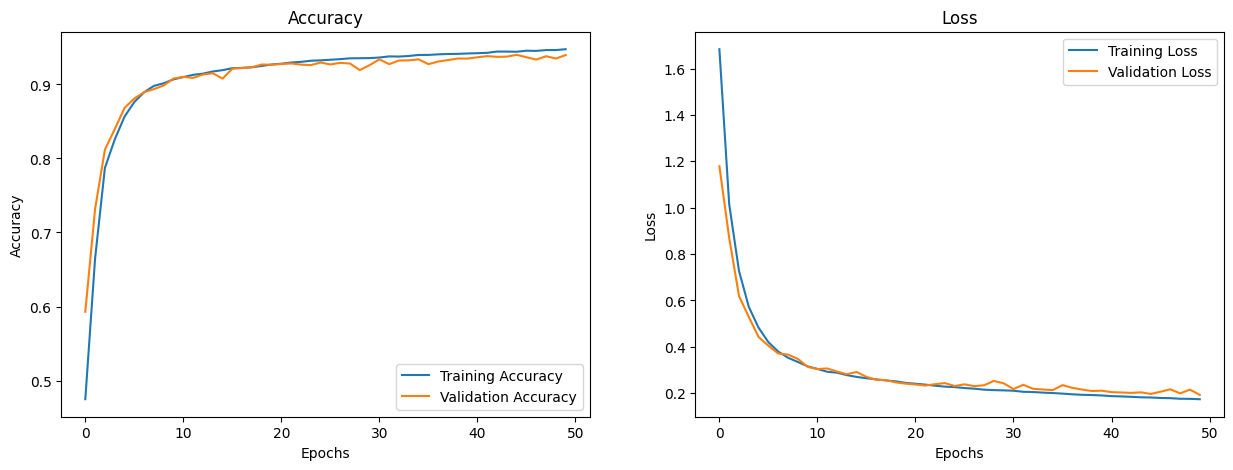

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.subplots_adjust(hspace=0.5)

ax[0].plot(history['training']['accuracy'], label='Training Accuracy')
ax[0].plot(history['eval']['accuracy'], label='Validation Accuracy')
ax[0].set_title('Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

ax[1].plot(history['training']['loss'], label='Training Loss')
ax[1].plot(history['eval']['loss'], label='Validation Loss')
ax[1].set_title('Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

plt.show()

In [31]:
_ = classifier.evaluate()

Batch: 1050 | Loss: 0.1926 | Accuracy: 0.9397: 100%|██████████| 1050/1050 [00:04<00:00, 212.15it/s]


In [32]:
test_in, test_out = next(iter(test_loader))

In [33]:
predictions = classifier.predict(test_in)

print(f'True values are: {test_out.argmax(-1)}')
print(f'Predictions are: {predictions}')

True values are: [3 2 1 1 3 7 9 5 7 6 1 3 2 5 1 9 9 7 2 6 5 9 9 1 9 9 9 6 9 4 7 7]
Predictions are: [3 2 1 1 9 7 9 5 7 5 1 3 2 3 1 9 5 7 2 6 0 9 9 1 9 9 9 6 9 9 7 7]
